In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('H:\\Datatsets\\Recommendation systems\\Movielens\\ratings.csv')
# , sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating']

In [2]:

# Reading users file
users = pd.read_csv('H:\\Datatsets\\Recommendation systems\\Movielens\\users.csv',encoding='latin-1')
# , sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('H:\\Datatsets\\Recommendation systems\\\Movielens\\movies.csv',encoding='latin-1')
# , sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres']

In [3]:
ratings.head(), users.head(), movies.head()

(   user_id  movie_id  rating  timestamp
 0        1      1193       5  978300760
 1        1       661       3  978302109
 2        1       914       3  978301968
 3        1      3408       4  978300275
 4        1      2355       5  978824291,
    user_id gender       age            occupation zip_code
 0        1      F  Under 18          K-12 student    48067
 1        2      M       56+         self-employed    70072
 2        3      M     25-34             scientist    55117
 3        4      M     45-49  executive/managerial    02460
 4        5      M     25-34                writer    55455,
    movie_id                               movie                        genres
 0         1                    Toy Story (1995)   Animation|Children's|Comedy
 1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
 2         3             Grumpier Old Men (1995)                Comedy|Romance
 3         4            Waiting to Exhale (1995)                  Comedy|Dra

In [4]:
# Check the file info
ratings.info(), users.info(), movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null object
occupation    6040 non-null object
zip_code      6040 non-null object
dtypes: int64(1), object(4)
memory usage: 236.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
movie       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


(None, None, None)

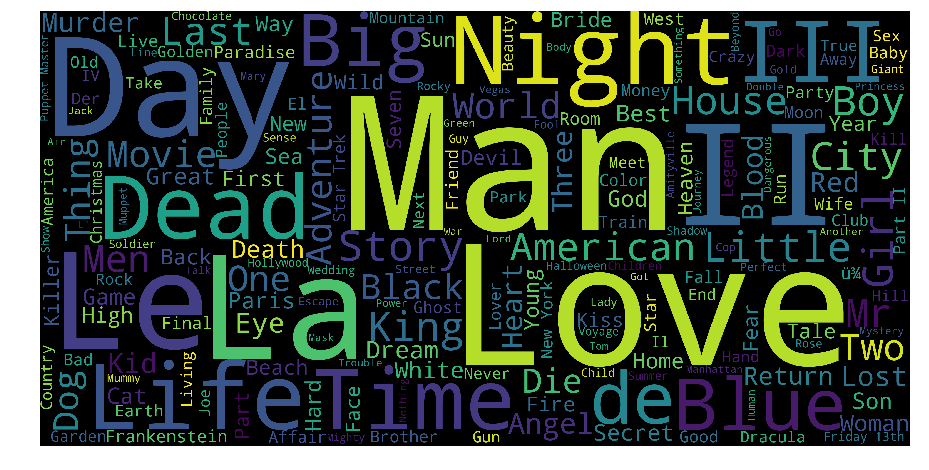

In [5]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['movie'] = movies['movie'].fillna("").astype('str')
title_corpus = ' '.join(movies['movie'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [6]:
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

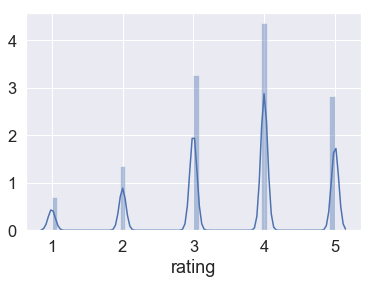

In [7]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [8]:
# Join all 3 files into one dataframe
dataset = pd.merge(pd.merge(movies, ratings),users)
# Display 20 movies with highest ratings
dataset[['movie','genres','rating']].sort_values('rating', ascending=False).head(20)

,movie,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [9]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

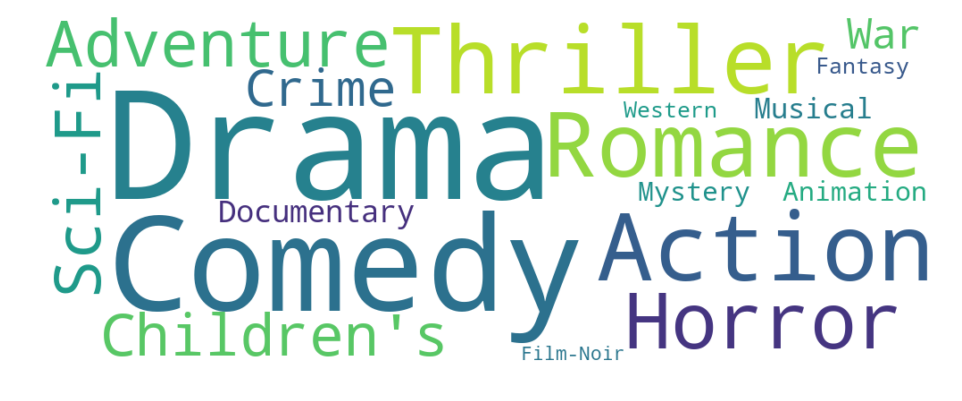

In [10]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. To do so, I will make use of the file movies.csv.

In [11]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

In [13]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [14]:
# Build a 1-dimensional array with movie titles
titles = movies['movie']
indices = pd.Series(movies.index, index=movies['movie'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [15]:
genre_recommendations('Good Will Hunting (1997)').head(20)

25                                        Othello (1995)
26                                   Now and Then (1995)
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                                Dangerous Minds (1995)
35                               Dead Man Walking (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
52                                       Lamerica (1994)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
77                            Crossing Guard, The (1995)
79          White Balloon, The (Badkonake Sefid ) (1995)
81                       Antonia's Line (Antonia) (1995)
82       Once Upon a Time... When We Were Colored (1995)
89                    Journey of August King, The (1995)
92                             

Overall, here are the pros of using content-based recommendation:

    No need for data on other users, thus no cold-start or sparsity problems.
    Can recommend to users with unique tastes.
    Can recommend new & unpopular items.
    Can provide explanations for recommended items by listing content-features that caused an item to be recommended (in this case, movie genres)

However, there are some cons of using this approach:

    Finding the appropriate features is hard.
    Does not recommend items outside a user's content profile.
    Unable to exploit quality judgments of other users.


I will use the file ratings.csv first as it contains User ID, Movie IDs and Ratings. These three elements are all I need for determining the similarity of the users based on their ratings for a particular movie.

First I do some quick data processing:

In [16]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [17]:
# Randomly sample 1% of the ratings dataset
small_data = ratings.sample(frac=0.025)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25005 entries, 789932 to 631537
Data columns (total 4 columns):
user_id      25005 non-null int64
movie_id     25005 non-null int64
rating       25005 non-null int64
timestamp    25005 non-null int64
dtypes: int64(4)
memory usage: 976.8 KB
None


In [18]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(small_data, test_size=0.2)

In [19]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])
test_data_matrix = test_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(20004, 3)
(5001, 3)


C:\Users\mrudulbanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\mrudulbanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Now I use the pairwise_distances function from sklearn to calculate the Pearson Correlation Coefficient. This method provides a safe way to take a distance matrix as input, while preserving compatibility with many other algorithms that take a vector array.

In [20]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation') #cosine
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [21]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation') #cosine
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.02240121  0.00941804]
 [-0.02240121  1.         -0.06632923]
 [ 0.00941804 -0.06632923  1.        ]]


In [22]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [24]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1350.7244475611626
Item-based CF RMSE: 1623.5586789504937


In [25]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 967.1052821947043
Item-based CF RMSE: 172.7126931964425


RMSE of training of model is a metric which measure how much the signal and the noise is explained by the model. I noticed that my RMSE is quite big. I suppose I might have overfitted the training data.

Overall, Memory-based Collaborative Filtering is easy to implement and produce reasonable prediction quality. However, there are some drawback of this approach:

    It doesn't address the well-known cold-start problem, that is when new user or new item enters the system.
    It can't deal with sparse data, meaning it's hard to find users that have rated the same items.
    It suffers when new users or items that don't have any ratings enter the system.
    It tends to recommend popular items.

# SVD

In [26]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 6040 | Number of movies = 3706


Now I want the format of my ratings matrix to be one row per user and one column per movie. To do so, I'll pivot ratings to get that and call the new variable Ratings (with a capital *R).

In [27]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Last but not least, I need to de-normalize the data (normalize by each users mean) and convert it from a dataframe to a numpy array.

In [28]:
R = Ratings.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

C:\Users\mrudulbanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [29]:
Ratings_demeaned

array([[ 4.94009714, -0.05990286, -0.05990286, ..., -0.05990286,
        -0.05990286, -0.05990286],
       [-0.12924987, -0.12924987, -0.12924987, ..., -0.12924987,
        -0.12924987, -0.12924987],
       [-0.05369671, -0.05369671, -0.05369671, ..., -0.05369671,
        -0.05369671, -0.05369671],
       ...,
       [-0.02050729, -0.02050729, -0.02050729, ..., -0.02050729,
        -0.02050729, -0.02050729],
       [-0.1287102 , -0.1287102 , -0.1287102 , ..., -0.1287102 ,
        -0.1287102 , -0.1287102 ],
       [ 2.6708041 , -0.3291959 , -0.3291959 , ..., -0.3291959 ,
        -0.3291959 , -0.3291959 ]])


Model-Based Collaborative Filtering

Model-based Collaborative Filtering is based on matrix factorization (MF) which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF:

    The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items.
    When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization, you can restructure the user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector.
    You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

For example, let's check the sparsity of the ratings dataset:


In [30]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_movies), 3)
print('The sparsity level of MovieLens1M dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens1M dataset is 95.5%



Setting Up SVD

Scipy and Numpy both have functions to do the singular value decomposition. I'm going to use the Scipy function svds because it let's me choose how many latent factors I want to use to approximate the original ratings matrix (instead of having to truncate it after).


In [31]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [32]:
sigma = np.diag(sigma)


Making Predictions from the Decomposed Matrices

I now have everything I need to make movie ratings predictions for every user. I can do it all at once by following the math and matrix multiply $U$, $\Sigma$, and $V^{T}$ back to get the rank $k=50$ approximation of $A$.

But first, I need to add the user means back to get the actual star ratings prediction.


In [33]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [34]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


In [35]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [36]:
already_rated, predictions = recommend_movies(preds, 1310, movies, ratings, 20)

User 1310 has already rated 24 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [37]:
# Top 20 movies that User 1310 has rated 
already_rated.head(20)

,user_id,movie_id,rating,timestamp,movie,genres
5,1310,2248,5,974781573,Say Anything... (1989),"['Comedy', 'Drama', 'Romance']"
6,1310,2620,5,974781573,This Is My Father (1998),"['Drama', 'Romance']"
7,1310,3683,5,974781935,Blood Simple (1984),"['Drama', 'Film-Noir']"
15,1310,1704,5,974781573,Good Will Hunting (1997),['Drama']
1,1310,1293,5,974781839,Gandhi (1982),['Drama']
12,1310,3101,4,974781573,Fatal Attraction (1987),['Thriller']
11,1310,1343,4,974781534,Cape Fear (1991),['Thriller']
20,1310,2000,4,974781892,Lethal Weapon (1987),"['Action', 'Comedy', 'Crime', 'Drama']"
18,1310,3526,4,974781892,Parenthood (1989),"['Comedy', 'Drama']"
17,1310,3360,4,974781935,Hoosiers (1986),['Drama']


In [38]:
# Top 20 movies that User 1310 hopefully will enjoy
predictions

,movie_id,movie,genres
1618,1674,Witness (1985),"['Drama', 'Romance', 'Thriller']"
1880,1961,Rain Man (1988),['Drama']
1187,1210,Star Wars: Episode VI - Return of the Jedi (1983),"['Action', 'Adventure', 'Romance', 'Sci-Fi', '..."
1216,1242,Glory (1989),"['Action', 'Drama', 'War']"
1202,1225,Amadeus (1984),['Drama']
1273,1302,Field of Dreams (1989),['Drama']
1220,1246,Dead Poets Society (1989),['Drama']
1881,1962,Driving Miss Daisy (1989),['Drama']
1877,1957,Chariots of Fire (1981),['Drama']
1938,2020,Dangerous Liaisons (1988),"['Drama', 'Romance']"


In [39]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD, evaluate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Split the dataset for 5-fold evaluation
data.split(n_folds=5)

In [40]:
# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm.
evaluate(svd, data, measures=['RMSE'])

C:\Users\mrudulbanka\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Users\mrudulbanka\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8740
------------
Fold 2
RMSE: 0.8733
------------
Fold 3
RMSE: 0.8725
------------
Fold 4
RMSE: 0.8753
------------
Fold 5
RMSE: 0.8732
------------
------------
Mean RMSE: 0.8737
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8740200877023483,
                             0.8732553368252801,
                             0.8724624716058472,
                             0.8753172090382761,
                             0.8732025881616101]})

In [41]:
trainset = data.build_full_trainset()
svd.train(trainset)

C:\Users\mrudulbanka\Anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [42]:
ratings[ratings['user_id'] == 1310]

,user_id,movie_id,rating,timestamp
215928,1310,2988,3,974781935
215929,1310,1293,5,974781839
215930,1310,1295,2,974782001
215931,1310,1299,4,974781701
215932,1310,2243,4,974782001
215933,1310,2248,5,974781573
215934,1310,2620,5,974781573
215935,1310,3683,5,974781935
215936,1310,3685,4,974781935
215937,1310,1185,4,974781839


In [44]:
svd.predict(1310, 1994)

Prediction(uid=1310, iid=1994, r_ui=None, est=3.4516462373285104, details={'was_impossible': False})